<a href="https://colab.research.google.com/github/brandonthimmesch/IMSE541/blob/main/SQC_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import math
import statistics
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd
from statsmodels.stats import weightstats as stests
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots as sm

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading in data
data = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SQC_Lab2_Data.csv', sep=',', na_values=".")
data.head()

,Batch 1,Batch 2
0,1.001,1.000
1,1.005,1.005
2,1.015,1.015
3,1.020,1.005
4,1.010,0.990


In [4]:
# creating batch 1 dataframe
batch1 = data['Batch 1']
batch1.head()

0    1.001
1    1.005
2    1.015
3    1.020
4    1.010
Name: Batch 1, dtype: float64

In [5]:
# creating batch 2 dataframe
batch2 = data['Batch 2']
batch2.head()

0    1.000
1    1.005
2    1.015
3    1.005
4    0.990
Name: Batch 2, dtype: float64

In [6]:
# batch 1 descriptive statistics
batch1.describe()

count    50.000000
mean      1.003360
std       0.007714
min       0.985000
25%       0.999000
50%       1.001000
75%       1.009000
max       1.025000
Name: Batch 1, dtype: float64

In [7]:
# batch 2 descriptive statistics
batch2.describe()

count    50.000000
mean      1.003660
std       0.007227
min       0.990000
25%       1.000000
50%       1.005000
75%       1.006750
max       1.019000
Name: Batch 2, dtype: float64

The descriptive statistics for batches 1 and 2 show these sets have identical means, as well as similar variance and deviation although batch 1's variability is greater. However, they are distributed differently as shown by the quartile values. Batch 2 appears to be skewed above the target diameter of 1 inch whereas batch 1 is more normally distributed around 1 inch. Additionally, batch 1's extremes cover a greater range than that of batch 2.

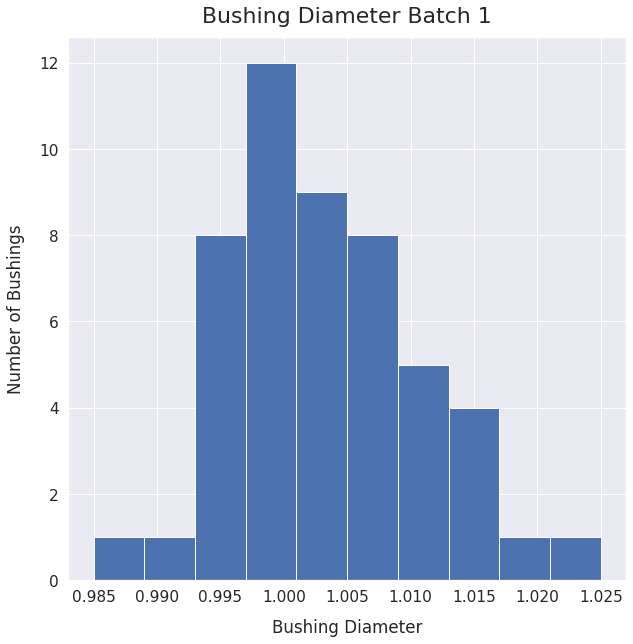

In [8]:
# batch 1 histogram
sns.set(font_scale=1.4)
batch1.plot(kind='hist', figsize=(10, 10));
plt.xlabel("Bushing Diameter", labelpad=14)
plt.ylabel("Number of Bushings", labelpad=14)
plt.title("Bushing Diameter Batch 1", y=1.015, fontsize=22);

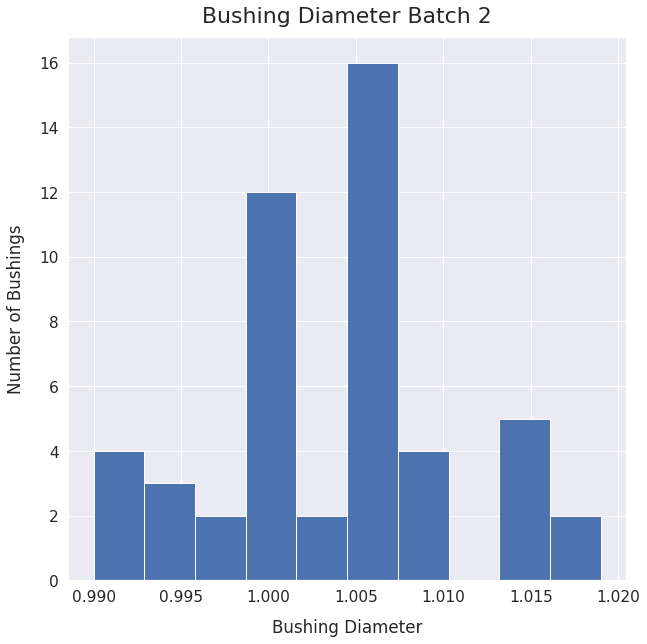

In [9]:
# batch 2 histogram
sns.set(font_scale=1.4)
batch2.plot(kind='hist', figsize=(10, 10));
plt.xlabel("Bushing Diameter", labelpad=14)
plt.ylabel("Number of Bushings", labelpad=14)
plt.title("Bushing Diameter Batch 2", y=1.015, fontsize=22);

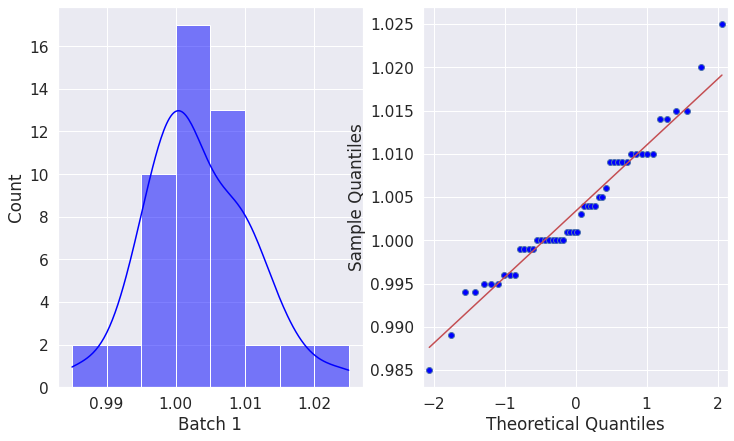

In [10]:
# batch 1 normal probability plot
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(batch1).qqplot(line='s', ax=ax[1]);
sns.histplot(batch1,kde=True, color ='blue',ax=ax[0])

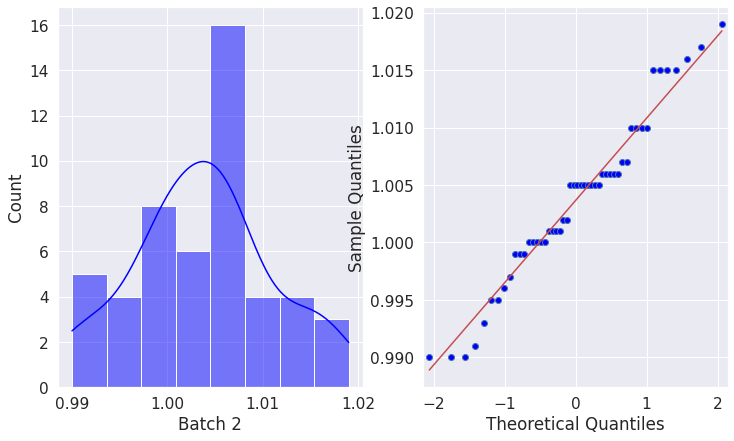

In [11]:
# batch 2 normal probability plot
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(batch2).qqplot(line='s', ax=ax[1]);
sns.histplot(batch2,kde=True, color ='blue',ax=ax[0])

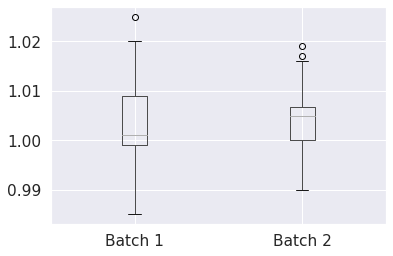

In [12]:
# bushing diameter box plot for batches 1 and 2
data.boxplot()

Both batch 1 and batch 2 contain outliers, however, their distributions resemble a bell curve of a normal distribution.

However, batch 1 has more variability than batch 2, which is plainly depicted in the above box plot.

In [15]:
# printing 95% confidence interval for batch 1 mean diameter
stats.t.interval(alpha=0.95, df=len(batch1)-1, loc=np.mean(batch1), scale=stats.sem(batch1)) 

(1.0011678046151817, 1.0055521900648183)

In [16]:
# printing 95% confidence interval for batch 2 mean diameter
stats.t.interval(alpha=0.95, df=len(batch2)-1, loc=np.mean(batch2), scale=stats.sem(batch2)) 

(1.0016061246791232, 1.0057138835608765)

In [17]:
# (A)
# hypothesis test for mean with variance unknown
# 1-sample t-test for batch 1

# H0: batch1 mean equals 1.001
# HA: batch1 mean does not equal 1.001

stats.ttest_1samp(batch1, 1.001, alternative='two-sided')

Ttest_1sampResult(statistic=2.163401125381316, pvalue=0.03541536231854205)

The P-value is equal to 0.0354, which is less than 0.05. I reject the null hypothesis, that the mean batch 1 diameter is equal to 1 inch, at a 96.46% significance level. This supports the alternative hypothesis that the batch 1 mean diameter does not equal 1 inch.

In [18]:
# (A)
# hypothesis test for mean with variance unknown
# 1-sample t-test for batch 2

# H0: batch2 mean equals 1.001
# HA: batch2 mean does not equal 1.001

stats.ttest_1samp(batch2, 1.001, alternative='two-sided')

Ttest_1sampResult(statistic=2.602625206136576, pvalue=0.01220475625210893)

The P-value is equal to 0.0122, which is less than 0.05. I reject the null hypothesis, that the mean batch 1 diameter is equal to 1 inch, at a 98.78% significance level. This supports the alternative hypothesis that the batch 2 mean diameter does not equal 1 inch.

In [19]:
# (B)
# hypothesis test for mean of two normal distributions with variance unknown
# 2-sample t-test for batches 1 and 2

# H0: batch 1 mean equals batch 2 mean
# HA: batch 1 mean does not equal batch 2 mean

stats.ttest_ind(batch1, batch2)

Ttest_indResult(statistic=-0.20069320812014202, pvalue=0.8413543932394967)

The P-value is equal to 0.8414, which is greater than 0.05. I fail to reject the null hypothesis, that batch 1 mean equals batch 2 mean, due to insufficient evidence.

In [20]:
# (C)
# hypothesis test on variances of normal distributions
# f-test for batches 1 and 2

# H0: batch 1 variance equals batch 2 variance
# HA: batch 1 variance does not equal batch 2 variance

# defining f-test function
def f_test(x,y):
  x=np.array(x)
  y=np.array(y)
  f=np.var(x,ddof=1)/np.var(y, ddof=1) # define f-test statistic
  dfn=x.size-1
  dfd=y.size-1
  p=1-stats.f.cdf(f,dfn, dfd) # find p-value of f-test statistic
  return f, p

f_test(batch1, batch2)

(1.1392199163691206, 0.32501448085544293)

The P-value is equal to 0.325, which is greater than 0.05. I fail to reject the null hypothesis, that batch 1 variance equals batch 2 variance, due to insufficient evidence.

However, the test statistic (which is equal to 1.1392) implies that batch 1 variance is greater than batch 2 variance.

**Can you conclude that both batches are from different populations?**

Having conducted t-tests and an f-test on batches 1 and 2, I cannot conclude with certainty that batches 1 and 2 are from different populations. Batches 1 and 2 have the same mean and nearly identical deviation. Batch 1's variance being slightly greater than that of batch 2's is not enough evidence for the conclusion that batch 1 and batch 2 are from different populations.

However, when the two batches are plotted together in a normal probability plot (pictured below), we can no longer assume normality since the observations do not trend along a straight line. Considering that both batches 1 and 2 followed normal distributions, it is safe to assume that if they were apart of the same population - that population would follow a normal distribution. Instead, when we put them together, the visualized data appears to be more randomly distributed like a scatter plot.

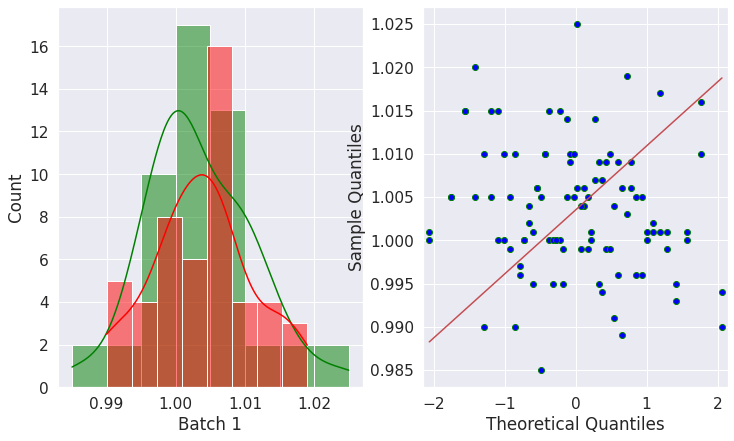

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(data).qqplot(line='s',color ='green', ax=ax[1]);
sns.histplot(data['Batch 1'],kde=True, color ='green',ax=ax[0])
sns.histplot(data['Batch 2'],kde=True, color ='red',ax=ax[0])

**Ex 4.6 - Suppose that you are testing the following hypotheses where the variance is unknown:
The sample size is n = 25. Find bounds on the 
P-value for the following values of the test statistic.
(a) t0 = −2.80
(b) t0 = −1.75
(c) t0 = −2.54
(d) t0 = −2.05**

In [22]:
# ex 4.6a
df = 25-1
TA = -2.8
TAUB = 2 * 0.005
TALB = 2 * 0.0025
TAP = 2 * stats.t.sf(abs(TA), df)

print('With the test statistic being', TA, 'the T-chart in the back of our textbook yields two tail P-value bounds of (', TALB, ',', TAUB,'). Python calculates the P-value to be ', TAP, 'which falls within this range.')

With the test statistic being -2.8 the T-chart in the back of our textbook yields two tail P-value bounds of ( 0.005 , 0.01 ). Python calculates the P-value to be  0.00992918127970918 which falls within this range.


In [23]:
# ex 4.6b
TB = -1.75
TBUB = 2 * 0.05
TBLB = 2 * 0.025
TBP = 2 * stats.t.sf(abs(TB), df)

print('With the test statistic being', TB, 'the T-chart in the back of our textbook yields two tail P-value bounds of (', TBLB, ',', TBUB,'). Python calculates the P-value to be ', TBP, 'which falls within this range.')

With the test statistic being -1.75 the T-chart in the back of our textbook yields two tail P-value bounds of ( 0.05 , 0.1 ). Python calculates the P-value to be  0.09289508894618881 which falls within this range.


In [24]:
# ex 4.6c
TC = -2.54
TCUB = 2 * 0.01
TCLB = 2 * 0.005
TCP = 2 * stats.t.sf(abs(TC), df)

print('With the test statistic being', TC, 'the T-chart in the back of our textbook yields two tail P-value bounds of (', TCLB, ',', TCUB,'). Python calculates the P-value to be ', TCP, 'which falls within this range.')

With the test statistic being -2.54 the T-chart in the back of our textbook yields two tail P-value bounds of ( 0.01 , 0.02 ). Python calculates the P-value to be  0.01797469985661915 which falls within this range.


In [25]:
# ex 4.6d
TD = -2.05
TDUB = 2 * 0.05
TDLB = 2 * 0.025
TDP = 2 * stats.t.sf(abs(TD), df)

print('With the test statistic being', TD, 'the T-chart in the back of our textbook yields two tail P-value bounds of (', TDLB, ',', TDUB,'). Python calculates the P-value to be ', TDP, 'which falls within this range.')

With the test statistic being -2.05 the T-chart in the back of our textbook yields two tail P-value bounds of ( 0.05 , 0.1 ). Python calculates the P-value to be  0.051441953457125635 which falls within this range.


**Ex 4.11 - A new process has been developed for applying
photoresist to 125-mm silicon wafers used in
manufacturing integrated circuits. Ten wafers were
tested, and the following photoresist thickness measurements were observed:
13.3987, 13.3957, 13.3902, 13.4015, 13.4001,
13.3918, 13.3965, 13.3925, 13.3946, and 13.4002.
(a) Test the hypothesis that mean thickness is
13.4. Use a = 0.05 and assume a two-sided alternative.
(b) Find a 99% two-sided confidence interval on
mean photoresist thickness. Assume that thickness is normally distributed.
(c) Does the normality assumption seem reasonable
for these data?**

In [26]:
X411 = [13.3987, 13.3957, 13.3902, 13.401, 13.4001, 13.3918, 13.3965, 13.3925, 13.3946, 13.4002]
DF411 = pd.DataFrame(X411)
DF411.head()

,0
0,13.3987
1,13.3957
2,13.3902
3,13.4010
4,13.4001


In [27]:
# ex 4.11a
# hypothesis test for mean with variance unknown
# 1-sample t-test for X411

# H0: Mean photoresist thickness measurement equals 13.4
# HA: Mean photoresist thickness measurement does not equal 13.4

stats.ttest_1samp(X411, 13.4, alternative='two-sided')

Ttest_1sampResult(statistic=-3.1907045166748866, pvalue=0.010994127806739348)

The P-value is equal to 0.0129, which is less than 0.05. I reject the null hypothesis, that the mean phototresist thickness measurement is equal to 13.4 x 10^3 angstroms, at a 98.71% significance level. This supports the alternative hypothesis that the mean photoresist thickness measurement does not equal 13.4.

In [28]:
# ex 4.11b
print('With 99% confidence, the mean photoresist thickness measurement falls within:', stats.t.interval(alpha=0.99, df=len(X411)-1, loc=np.mean(X411), scale=stats.sem(X411))) 

With 99% confidence, the mean photoresist thickness measurement falls within: (13.392188280079019, 13.40007171992098)


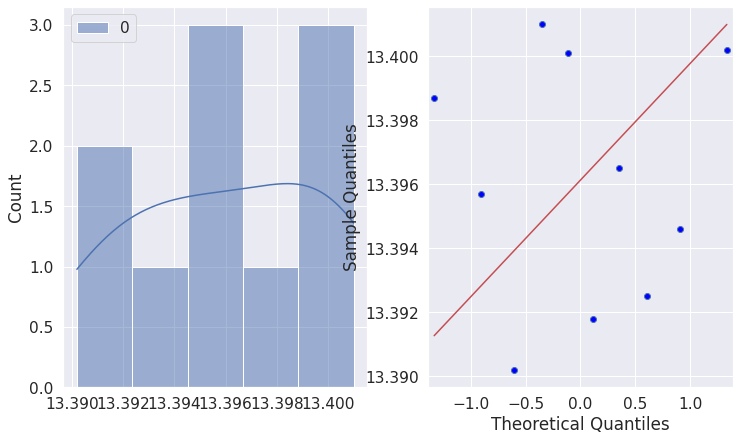

In [29]:
# ex 4.11c
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(DF411).qqplot(line='s', ax=ax[1]);
sns.histplot(DF411,kde=True, color ='blue',ax=ax[0])

Displayed above is the normal probability plot for this set of photoresist thickness measurements. On the left, you can see that the distribution does not follow a normal bell curve - meaning that it is difficult to assume normality, especially considering the sample size. At a glance, only three values in the sample are greater than 13.4 while the other seven are less than 13.4. The plot on the right depicts the magnitude of variance and presence of multiple outliers in the set.Since the observations do not trend along a straight line,and the sample provided has a size of 10 (n=10), we cannot assume normality.